### 폐암 환자의 폐암 예측

In [1]:
import pandas as pd

# 데이터 로드
data = pd.read_csv("./Data/ThoraricSurgery.csv", header=None)

data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,293,1,3.80,2.80,0,0,0,0,0,0,12,0,0,0,1,0,62,0
1,1,2,2.88,2.16,1,0,0,0,1,1,14,0,0,0,1,0,60,0
2,8,2,3.19,2.50,1,0,0,0,1,0,11,0,0,1,1,0,66,1
3,14,2,3.98,3.06,2,0,0,0,1,1,14,0,0,0,1,0,80,1
4,17,2,2.21,1.88,0,0,1,0,0,0,12,0,0,0,1,0,56,0


머신러닝 시 반드시 수행하는 세 함수
- .info()
- .describe()
- .corr()

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       470 non-null    int64  
 1   1       470 non-null    int64  
 2   2       470 non-null    float64
 3   3       470 non-null    float64
 4   4       470 non-null    int64  
 5   5       470 non-null    int64  
 6   6       470 non-null    int64  
 7   7       470 non-null    int64  
 8   8       470 non-null    int64  
 9   9       470 non-null    int64  
 10  10      470 non-null    int64  
 11  11      470 non-null    int64  
 12  12      470 non-null    int64  
 13  13      470 non-null    int64  
 14  14      470 non-null    int64  
 15  15      470 non-null    int64  
 16  16      470 non-null    int64  
 17  17      470 non-null    int64  
dtypes: float64(2), int64(16)
memory usage: 66.2 KB


In [3]:
##데이터분포 간단히 분석
data.describe()

#평균<표준편차 =='이상치가 있다'는 것  _여기 3같은경우는 머신러닝시 반드시 처리해줘야함(scaling등..)
#평균과 50%(중앙값)은 비슷해야 함 == 그렇지않으면 데이터가 한 쪽으로 치우쳐있다는 것!(e.g., 3의 데이터)
#min과 25% , 75%와 max 각각의 값 차이가 너무 크면 이상치가 있다는 것

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
count,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000
mean,235.500000,3.095745,3.281638,4.568702,0.780851,0.065957,0.144681,0.065957,0.687234,0.165957,11.736170,0.074468,0.004255,0.017021,0.821277,0.004255,62.534043,0.148936
std,135.821574,0.722309,0.871395,11.767857,0.535375,0.248472,0.352154,0.248472,0.464114,0.372439,0.702243,0.262811,0.065163,0.129488,0.383529,0.065163,8.706902,0.356405
min,1.000000,1.000000,1.440000,0.960000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000
25%,118.250000,3.000000,2.600000,1.960000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000,0.000000,1.000000,0.000000,57.000000,0.000000
50%,235.500000,3.000000,3.160000,2.400000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,0.000000,1.000000,0.000000,62.000000,0.000000
75%,352.750000,3.000000,3.807500,3.080000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,0.000000,1.000000,0.000000,69.000000,0.000000
max,470.000000,8.000000,6.300000,86.300000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,87.000000,1.000000


In [4]:
## 데이터의 상관관계
data.corr()  ## 11과 12 --> 0.018543로 높은상관관계 보이고 있다!

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1.000000,-0.007878,-0.034985,0.029563,-0.021449,0.052724,0.027238,-0.061885,0.008845,0.027271,0.047079,-0.009229,-0.016382,-0.015761,-0.038681,-0.042400,-0.005826,-0.074924
1,-0.007878,1.000000,0.121263,0.058780,-0.055900,0.047900,-0.062958,-0.047142,-0.075850,-0.019562,-0.135050,0.029753,-0.008675,-0.017461,-0.107427,-0.008675,0.076271,0.060444
2,-0.034985,0.121263,1.000000,0.032975,-0.091094,0.019786,-0.095827,0.055829,-0.052770,-0.100242,0.034088,-0.115145,-0.009135,-0.035584,-0.012009,-0.060578,-0.290178,-0.046374
3,0.029563,0.058780,0.032975,1.000000,-0.143155,0.161615,0.102979,0.260073,-0.099914,-0.086103,0.015504,-0.022251,-0.013617,-0.025088,-0.100853,-0.016509,-0.115900,-0.042841
4,-0.021449,-0.055900,-0.091094,-0.143155,1.000000,0.092863,0.123296,0.092863,0.684647,0.418042,0.089751,0.025310,0.026788,0.023166,0.172289,-0.034330,0.214528,0.093200
5,0.052724,0.047900,0.019786,0.161615,0.092863,1.000000,0.256225,0.067529,-0.024115,-0.072455,0.099942,0.022578,-0.017372,-0.034968,-0.077406,-0.017372,0.044789,0.057375
6,0.027238,-0.062958,-0.095827,0.102979,0.123296,0.256225,1.000000,0.134386,0.081772,0.060393,0.059840,-0.001471,-0.026886,0.086156,-0.044942,-0.026886,0.086705,0.065785
7,-0.061885,-0.047142,0.055829,0.260073,0.092863,0.067529,0.134386,1.000000,0.049843,-0.072455,0.075502,-0.042725,-0.017372,0.097572,-0.077406,-0.017372,-0.015331,0.105530
8,0.008845,-0.075850,-0.052770,-0.099914,0.684647,-0.024115,0.081772,0.049843,1.000000,0.202245,0.145345,0.016551,0.044101,0.017815,0.200373,-0.026401,0.149589,0.088860
9,0.027271,-0.019562,-0.100242,-0.086103,0.418042,-0.072455,0.060393,-0.072455,0.202245,1.000000,-0.036044,0.069522,0.058695,0.029726,0.118527,-0.029161,0.208003,0.086467


In [5]:
# X, y 분리
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X.shape, y.shape

((470, 17), (470,))

In [6]:
# 훈련데이터  / 테스트 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   random_state=7)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((352, 17), (118, 17), (352,), (118,))

#### 신경망 초기화를 위한 seed 설정

In [7]:
import numpy as np
import tensorflow
seed = 7 
np.random.seed(seed)
tensorflow.random.set_seed(seed)

#### 신경망 설계

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model1 = Sequential()

# 입력층
model1.add(Dense(32, input_dim=X_train.shape[1], activation="relu"))  #X_train.shape[1] = 17

# 은닉층    ###..이 부분짜는게 일...!
model1.add(Dense(64, activation="relu"))
model1.add(Dense(32, activation="relu"))
model1.add(Dense(16, activation="relu"))

# 출력층
model1.add(Dense(1, activation="sigmoid"))

model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                576       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 5,313
Trainable params: 5,313
Non-trainable params: 0
_________________________________________________________________


In [9]:
# 컴파일 (학습할수있는 모델로 만들어주기)
model1.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["acc"])

In [10]:
model1.fit(X_train, y_train, epochs=100, batch_size=50)

Train on 352 samples
Epoch 1/100
352/352 [==============================] - 1s 2ms/sample - loss: 0.9336 - acc: 0.7102
Epoch 2/100
352/352 [==============================] - 0s 57us/sample - loss: 0.6166 - acc: 0.8551
Epoch 3/100
352/352 [==============================] - 0s 59us/sample - loss: 0.4517 - acc: 0.8523
Epoch 4/100
352/352 [==============================] - 0s 53us/sample - loss: 0.4201 - acc: 0.8551
Epoch 5/100
352/352 [==============================] - 0s 57us/sample - loss: 0.4852 - acc: 0.8182
Epoch 6/100
352/352 [==============================] - 0s 51us/sample - loss: 0.4597 - acc: 0.8551
Epoch 7/100
352/352 [==============================] - 0s 60us/sample - loss: 0.5706 - acc: 0.7358
Epoch 8/100
352/352 [==============================] - 0s 54us/sample - loss: 0.4917 - acc: 0.8551
Epoch 9/100
352/352 [==============================] - 0s 49us/sample - loss: 0.5560 - acc: 0.8551
Epoch 10/100
352/352 [==============================] - 0s 51us/sample - loss: 0.4563 - a

In [11]:
# 평가하기
print("훈련 데이터 : ", model1.evaluate(X_train, y_train))
print("테스트 데이터 : ", model1.evaluate(X_test, y_test))

352/352 [==============================] - 0s 229us/sample - loss: 0.3987 - acc: 0.8551
훈련 데이터 :  [0.39868592945012177, 0.8551136]
118/118 [==============================] - 0s 650us/sample - loss: 0.5396 - acc: 0.8390
테스트 데이터 :  [0.5395694162886021, 0.83898306]


In [12]:
# 예측하기
pred = model1.predict(X_test).flatten()

for i in range(51,60):
    print("실제값 : {:.3f} ---> 예측값 : {:.3f}".format(y_test.iloc[i], pred[i])) #1은살고 0은사망

실제값 : 1.000 ---> 예측값 : 0.156
실제값 : 0.000 ---> 예측값 : 0.117
실제값 : 0.000 ---> 예측값 : 0.158
실제값 : 0.000 ---> 예측값 : 0.210
실제값 : 0.000 ---> 예측값 : 0.174
실제값 : 0.000 ---> 예측값 : 0.175
실제값 : 0.000 ---> 예측값 : 0.170
실제값 : 0.000 ---> 예측값 : 0.210
실제값 : 0.000 ---> 예측값 : 0.190


In [13]:
pred.shape, y_test.shape #((118, 1), (118,)) 여서 위에서 flatten()사용하여 크게 같게 만들어줌

((118,), (118,))

...? 구분이 안된다!

#### 이진분류를 출력을 2개로 설계하여 학습

In [14]:
y_train.shape, y_test.shape

((352,), (118,))

In [15]:
# One-hot encoding
y_train_en = pd.get_dummies(y_train)
y_test_en = pd.get_dummies(y_test)

y_train_en.shape, y_test_en.shape

((352, 2), (118, 2))

# 8th

#### 신경망 초기화

In [16]:
import numpy as np
import tensorflow

seed = 77
np.random.seed(seed)
tensorflow.random.set_seed(seed)

#### 신경망 설계

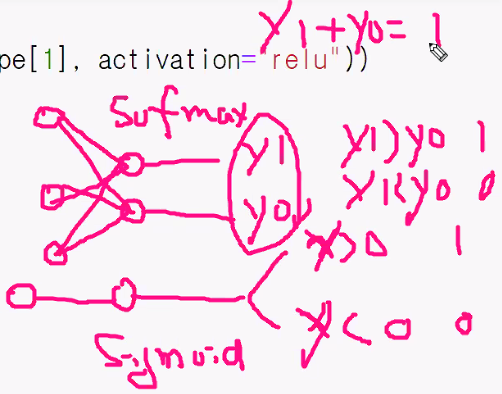

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model2 = Sequential()

# 입력층
model2.add(Dense(32, input_dim=X_train.shape[1], activation="relu"))

# 은닉층
model2.add(Dense(64, activation="relu"))
model2.add(Dense(32, activation="relu"))

# 출력층
model2.add(Dense(2, activation="softmax"))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 32)                576       
_________________________________________________________________
dense_6 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 66        
Total params: 4,834
Trainable params: 4,834
Non-trainable params: 0
_________________________________________________________________


In [18]:
model2.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["acc"])

In [19]:
model2.fit(X_train, y_train_en, epochs=100, batch_size=50)

Train on 352 samples
Epoch 1/100
352/352 [==============================] - 0s 959us/sample - loss: 10.6955 - acc: 0.1790
Epoch 2/100
352/352 [==============================] - 0s 54us/sample - loss: 1.7573 - acc: 0.7784
Epoch 3/100
352/352 [==============================] - 0s 51us/sample - loss: 2.1176 - acc: 0.8551
Epoch 4/100
352/352 [==============================] - 0s 48us/sample - loss: 2.1344 - acc: 0.8551
Epoch 5/100
352/352 [==============================] - 0s 51us/sample - loss: 2.0891 - acc: 0.8551
Epoch 6/100
352/352 [==============================] - 0s 48us/sample - loss: 2.0214 - acc: 0.8551
Epoch 7/100
352/352 [==============================] - 0s 59us/sample - loss: 1.6931 - acc: 0.8409
Epoch 8/100
352/352 [==============================] - 0s 57us/sample - loss: 1.1241 - acc: 0.5909
Epoch 9/100
352/352 [==============================] - 0s 60us/sample - loss: 1.1670 - acc: 0.8551
Epoch 10/100
352/352 [==============================] - 0s 59us/sample - loss: 0.6009 

In [20]:
print(model2.evaluate(X_train, y_train_en))
print(model2.evaluate(X_test, y_test_en))

352/352 [==============================] - 0s 224us/sample - loss: 0.4228 - acc: 0.8551
[0.42279512096535077, 0.8551136]
118/118 [==============================] - 0s 684us/sample - loss: 0.5330 - acc: 0.8390
[0.5330436578241445, 0.83898306]


In [21]:
pred2 = model2.predict(X_test)

In [22]:
y_test_en.head()

,0,1
253,1,0
243,1,0
13,1,0
287,1,0
370,1,0


In [23]:
y_test_en["pred0"] = pred2[:,0]
y_test_en["pred1"] = pred2[:,1]

y_test_en.head()

,0,1,pred0,pred1
253,1,0,0.918959,0.081041
243,1,0,0.909593,0.090407
13,1,0,0.933111,0.066889
287,1,0,0.924813,0.075187
370,1,0,0.953985,0.046015


In [24]:
y_train.value_counts()

0    301
1     51
Name: 17, dtype: int64

## Boston 집 값을 이용한 회귀 분석

In [25]:
from tensorflow.keras.datasets import boston_housing

(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

In [26]:
X_train.shape

(404, 13)

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model3 = Sequential()

# 입력층
model3.add(Dense(32, input_dim=X_train.shape[1], activation="relu"))

# 은닉층
model3.add(Dense(16, activation="relu"))

# 출력층
# linear : 항등함수 (출력을 그대로 보냄 - 안 써도 됨)
##특성에 따라 값을 뽑아내는 회귀
model3.add(Dense(1, activation="linear"))

model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 32)                448       
_________________________________________________________________
dense_10 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 17        
Total params: 993
Trainable params: 993
Non-trainable params: 0
_________________________________________________________________


In [28]:
model3.compile(loss="mse",
              optimizer="rmsprop") #adam은 방향까지 고려하기때문에 느릴때 있음  #그냥 rmsprop 써봄
#회귀라서 정확도필요없어서 안씀
###(분류는 정답이 이거아님 저거라고 정해져있지만, 회귀는 특성에 따라 분류되는 것이므로 
### 정답이 확실히 정해졌다고 할 수 없음 즉 정확도가 아닌 오차의 정도를 보아야함)

In [29]:
model3.fit(X_train, y_train, epochs=100, batch_size=50)

Train on 404 samples
Epoch 1/100
404/404 [==============================] - 0s 760us/sample - loss: 481.3516
Epoch 2/100
404/404 [==============================] - 0s 45us/sample - loss: 109.6233
Epoch 3/100
404/404 [==============================] - 0s 45us/sample - loss: 87.4826
Epoch 4/100
404/404 [==============================] - 0s 49us/sample - loss: 87.3790
Epoch 5/100
404/404 [==============================] - 0s 44us/sample - loss: 76.4317
Epoch 6/100
404/404 [==============================] - 0s 46us/sample - loss: 82.3327
Epoch 7/100
404/404 [==============================] - 0s 37us/sample - loss: 77.6252
Epoch 8/100
404/404 [==============================] - 0s 42us/sample - loss: 71.0208
Epoch 9/100
404/404 [==============================] - 0s 42us/sample - loss: 60.9235
Epoch 10/100
404/404 [==============================] - 0s 47us/sample - loss: 82.8740
Epoch 11/100
404/404 [==============================] - 0s 40us/sample - loss: 60.8215
Epoch 12/100
404/404 [======

Epoch 95/100
404/404 [==============================] - 0s 40us/sample - loss: 39.9783
Epoch 96/100
404/404 [==============================] - 0s 42us/sample - loss: 51.4267
Epoch 97/100
404/404 [==============================] - 0s 44us/sample - loss: 37.2214
Epoch 98/100
404/404 [==============================] - 0s 42us/sample - loss: 42.0082
Epoch 99/100
404/404 [==============================] - 0s 44us/sample - loss: 47.6139
Epoch 100/100
404/404 [==============================] - 0s 42us/sample - loss: 40.7365


In [30]:
pred3 = model3.predict(X_test)

In [31]:
for i in range(10):
    print("실제값 : {}, 예측값 : {}".format(y_test[i], pred3[i]))

실제값 : 7.2, 예측값 : [5.0020537]
실제값 : 18.8, 예측값 : [17.123838]
실제값 : 19.0, 예측값 : [23.376116]
실제값 : 27.0, 예측값 : [20.401522]
실제값 : 22.2, 예측값 : [24.733912]
실제값 : 24.5, 예측값 : [19.009962]
실제값 : 31.2, 예측값 : [24.21734]
실제값 : 22.9, 예측값 : [23.148123]
실제값 : 20.5, 예측값 : [17.260082]
실제값 : 23.2, 예측값 : [15.693273]


#### 손실함수 (비용함수, cost function) - MSE, RMSE, MAPE, R2 score

In [32]:
# RMSE를 계산 
## .sqrt() ==> ()의 제곱근을 반환하는 sqrt함수
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(y_test, pred3))

7.108933597147678

## BMI 데이터를 이용한 다중분류

In [33]:
import pandas as pd

bmi = pd.read_csv("Data/bmi_500.csv")
bmi.head()

,Gender,Height,Weight,Label
0,Male,174,96,Obesity
1,Male,189,87,Normal
2,Female,185,110,Obesity
3,Female,195,104,Overweight
4,Male,149,61,Overweight


In [34]:
# Male : 1, Female : 0으로 Label Encoding
bmi["Gender"] = bmi["Gender"].map({"Male":1, "Female":0})
bmi.head()

#bmi['Gender']=bmi.apply(lambda row:(0 if row['Gender']=="Male" else 1), axis=1)

,Gender,Height,Weight,Label
0,1,174,96,Obesity
1,1,189,87,Normal
2,0,185,110,Obesity
3,0,195,104,Overweight
4,1,149,61,Overweight


In [35]:
# X, y 분리
X = bmi.iloc[:, :-1]
y = bmi.iloc[:, -1]

X.shape, y.shape

((500, 3), (500,))

In [36]:
# 훈련데이터와 테스트데이터로 분리 (훈련데이터 350개, 테스트데이터 150개)
X_train = X.iloc[:350, :] 
X_test = X.iloc[350:, :] 

y_train = y.iloc[:350] 
y_test = y.iloc[350:] 

In [37]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((350, 3), (150, 3), (350,), (150,))

#### 신경망 설계

In [38]:
y_train.unique() #6개 --> 출력층에 쓸 구분할 숫자

array(['Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak',
       'Extremely Weak'], dtype=object)

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model4 = Sequential()

# 입력층
model4.add(Dense(8, input_dim=X_train.shape[1], activation="relu"))

# 은닉층
model4.add(Dense(16, activation="relu"))
model4.add(Dense(64, activation="relu"))
model4.add(Dense(16, activation="relu"))

# 출력층
model4.add(Dense(6, activation="softmax")) #if (Dense>=2) {activation="softmax"}

model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 8)                 32        
_________________________________________________________________
dense_13 (Dense)             (None, 16)                144       
_________________________________________________________________
dense_14 (Dense)             (None, 64)                1088      
_________________________________________________________________
dense_15 (Dense)             (None, 16)                1040      
_________________________________________________________________
dense_16 (Dense)             (None, 6)                 102       
Total params: 2,406
Trainable params: 2,406
Non-trainable params: 0
_________________________________________________________________


In [40]:
model4.compile(loss="categorical_crossentropy",
             optimizer="rmsprop",
             metrics=["acc"])

In [41]:
#from tensorflow.keras.utils import to_categorical ### One-hot Encoding을 해주는 to_categoriacal
#y_train_en = to_categorical(y_train)
#y_test_en  = to_categorical(y_test)

y_train_en = pd.get_dummies(y_train)
y_test_en  = pd.get_dummies(y_test)

y_train_en.shape, y_test_en.shape

((350, 6), (150, 6))

In [42]:
#validation_data : 훈련과 동시에 검증하기 위한 데이터를 설정
#validation_split : 훈련과 동시에 검증하기 위한 데이터의 비율을 설정
model4.fit(X_train, y_train_en, epochs=500, batch_size=50,
          validation_data=[X_test, y_test_en])

Train on 350 samples, validate on 150 samples
Epoch 1/500
350/350 [==============================] - 1s 2ms/sample - loss: 6.2864 - acc: 0.1371 - val_loss: 3.4432 - val_acc: 0.0733
Epoch 2/500
350/350 [==============================] - 0s 82us/sample - loss: 2.8278 - acc: 0.1086 - val_loss: 2.6512 - val_acc: 0.0200
Epoch 3/500
350/350 [==============================] - 0s 74us/sample - loss: 2.4667 - acc: 0.2886 - val_loss: 2.2831 - val_acc: 0.1333
Epoch 4/500
350/350 [==============================] - 0s 71us/sample - loss: 2.1282 - acc: 0.1571 - val_loss: 2.1487 - val_acc: 0.2333
Epoch 5/500
350/350 [==============================] - 0s 68us/sample - loss: 1.9792 - acc: 0.2971 - val_loss: 1.8663 - val_acc: 0.4200
Epoch 6/500
350/350 [==============================] - 0s 77us/sample - loss: 1.8853 - acc: 0.2800 - val_loss: 1.8384 - val_acc: 0.4200
Epoch 7/500
350/350 [==============================] - 0s 71us/sample - loss: 1.7130 - acc: 0.3486 - val_loss: 1.6344 - val_acc: 0.4200
Epo

Epoch 120/500
350/350 [==============================] - 0s 68us/sample - loss: 0.6990 - acc: 0.6714 - val_loss: 0.6296 - val_acc: 0.6867
Epoch 121/500
350/350 [==============================] - 0s 72us/sample - loss: 0.7170 - acc: 0.6600 - val_loss: 0.6427 - val_acc: 0.6800
Epoch 122/500
350/350 [==============================] - 0s 74us/sample - loss: 0.6960 - acc: 0.6971 - val_loss: 0.6288 - val_acc: 0.6467
Epoch 123/500
350/350 [==============================] - 0s 73us/sample - loss: 0.6715 - acc: 0.6971 - val_loss: 0.6165 - val_acc: 0.6800
Epoch 124/500
350/350 [==============================] - 0s 74us/sample - loss: 0.6398 - acc: 0.7143 - val_loss: 0.6454 - val_acc: 0.6600
Epoch 125/500
350/350 [==============================] - 0s 74us/sample - loss: 0.6872 - acc: 0.6829 - val_loss: 0.6705 - val_acc: 0.6333
Epoch 126/500
350/350 [==============================] - 0s 71us/sample - loss: 0.6817 - acc: 0.6886 - val_loss: 0.6078 - val_acc: 0.7200
Epoch 127/500
350/350 [===========

350/350 [==============================] - 0s 77us/sample - loss: 0.6163 - acc: 0.7257 - val_loss: 0.5254 - val_acc: 0.7000
Epoch 239/500
350/350 [==============================] - 0s 76us/sample - loss: 0.5965 - acc: 0.7286 - val_loss: 0.5215 - val_acc: 0.6933
Epoch 240/500
350/350 [==============================] - 0s 74us/sample - loss: 0.5629 - acc: 0.7429 - val_loss: 0.5656 - val_acc: 0.7400
Epoch 241/500
350/350 [==============================] - 0s 69us/sample - loss: 0.6056 - acc: 0.7200 - val_loss: 0.5403 - val_acc: 0.7400
Epoch 242/500
350/350 [==============================] - 0s 77us/sample - loss: 0.5895 - acc: 0.7343 - val_loss: 0.5158 - val_acc: 0.7733
Epoch 243/500
350/350 [==============================] - 0s 77us/sample - loss: 0.5773 - acc: 0.7429 - val_loss: 0.5005 - val_acc: 0.7733
Epoch 244/500
350/350 [==============================] - 0s 77us/sample - loss: 0.5739 - acc: 0.7229 - val_loss: 0.5361 - val_acc: 0.7333
Epoch 245/500
350/350 [=========================

350/350 [==============================] - 0s 72us/sample - loss: 0.5311 - acc: 0.7343 - val_loss: 0.4914 - val_acc: 0.7733
Epoch 357/500
350/350 [==============================] - 0s 80us/sample - loss: 0.5626 - acc: 0.7486 - val_loss: 0.4971 - val_acc: 0.7467
Epoch 358/500
350/350 [==============================] - 0s 71us/sample - loss: 0.5323 - acc: 0.7829 - val_loss: 0.4657 - val_acc: 0.7800
Epoch 359/500
350/350 [==============================] - 0s 77us/sample - loss: 0.5573 - acc: 0.7486 - val_loss: 0.4894 - val_acc: 0.7400
Epoch 360/500
350/350 [==============================] - 0s 74us/sample - loss: 0.5246 - acc: 0.7743 - val_loss: 0.5194 - val_acc: 0.7600
Epoch 361/500
350/350 [==============================] - 0s 71us/sample - loss: 0.5461 - acc: 0.7143 - val_loss: 0.4831 - val_acc: 0.7667
Epoch 362/500
350/350 [==============================] - 0s 71us/sample - loss: 0.5358 - acc: 0.7657 - val_loss: 0.4994 - val_acc: 0.7267
Epoch 363/500
350/350 [=========================

350/350 [==============================] - 0s 59us/sample - loss: 0.5269 - acc: 0.7629 - val_loss: 0.4775 - val_acc: 0.7733
Epoch 475/500
350/350 [==============================] - 0s 57us/sample - loss: 0.5005 - acc: 0.7743 - val_loss: 0.4383 - val_acc: 0.8000
Epoch 476/500
350/350 [==============================] - 0s 65us/sample - loss: 0.5399 - acc: 0.7600 - val_loss: 0.5360 - val_acc: 0.7467
Epoch 477/500
350/350 [==============================] - 0s 68us/sample - loss: 0.5049 - acc: 0.7943 - val_loss: 0.4423 - val_acc: 0.7933
Epoch 478/500
350/350 [==============================] - 0s 69us/sample - loss: 0.4984 - acc: 0.7829 - val_loss: 0.4386 - val_acc: 0.7933
Epoch 479/500
350/350 [==============================] - 0s 68us/sample - loss: 0.4952 - acc: 0.7800 - val_loss: 0.4792 - val_acc: 0.7867
Epoch 480/500
350/350 [==============================] - 0s 62us/sample - loss: 0.5385 - acc: 0.7629 - val_loss: 0.5248 - val_acc: 0.7333
Epoch 481/500
350/350 [=========================

In [43]:
model4.evaluate(X_test, y_test_en)

150/150 [==============================] - 0s 601us/sample - loss: 0.4301 - acc: 0.8200


[0.4300594373544057, 0.82]

In [44]:
pred4 = model4.predict(X_test)

In [45]:
y_train.unique()

array(['Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak',
       'Extremely Weak'], dtype=object)

In [46]:
y_test_en["Extreme Obesity_1"] = pred4[:, 0]
y_test_en["Extremely Weak_1"] = pred4[:, 1]
y_test_en["Normal_1"] = pred4[:, 2]
y_test_en["Obesity_1"] = pred4[:, 3]
y_test_en["Overweight_1"] = pred4[:, 4]
y_test_en["Weak_1"] = pred4[:, 5]

#pd.options.display.float_format = '{:.8f}'.format
y_test_en.head()

,Extreme Obesity,Extremely Weak,Normal,Obesity,Overweight,Weak,Extreme Obesity_1,Extremely Weak_1,Normal_1,Obesity_1,Overweight_1,Weak_1
350,0,0,1,0,0,0,1.841845e-06,4.522915e-08,3.810953e-01,3.600124e-02,5.826532e-01,2.483649e-04
351,0,0,1,0,0,0,7.300429e-08,6.121572e-08,5.100628e-01,1.354495e-02,4.760229e-01,3.692700e-04
352,0,0,1,0,0,0,4.077722e-17,1.928048e-01,2.939310e-01,4.636804e-07,1.587928e-03,5.116758e-01
353,1,0,0,0,0,0,9.947281e-01,3.754819e-25,2.777741e-16,5.271695e-03,9.968252e-08,1.542254e-21
354,0,1,0,0,0,0,8.017217e-27,8.966517e-01,2.710267e-03,4.937917e-12,5.889426e-07,1.006374e-01


## WINE 데이터를 이용한 딥러닝개인실습

In [47]:
wine = pd.read_csv("Data/wine.csv")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [70]:
# X, y 분리

# type 컬럼을 이용한 이진분류 (레드와인1 화이트와인0)
X1 = wine.iloc[:, :-1]
y1 = wine.iloc[:, -1]

# quality 컬럼을 이용한 다중분류 (5-9등급)
X2 = wine.drop("quality",axis=1)  ## quality열이 빠진 데이터들
y2 = wine.loc[:,"quality"]  ## quality열 

# alcohol 컬럼을 이용한 회귀 (알코올 도수)
X3 = wine.drop("alcohol",axis=1)
y3 = wine.loc[:,"alcohol"] ## alcoho열

In [71]:
X1.shape, y1.shape, X2.shape, y2.shape, X3.shape, y3.shape

((6497, 12), (6497,), (6497, 12), (6497,), (6497, 12), (6497,))

In [72]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, random_state=7)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, random_state=7)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, random_state=7)

In [73]:
X_train1.shape, X_test1.shape, y_train1.shape, y_test1.shape

((4872, 12), (1625, 12), (4872,), (1625,))

# 12th

#### 신경망 초기화

In [74]:
import numpy as np
import tensorflow

seed = 0
np.random.seed(seed)
tensorflow.random.set_seed(seed)

#### 회귀분석
- 이런 조건일때 "도수"가 몇 도 인지? 알아보는 것
- *성분도 중요하지만 기간에 영향 많이 받음

In [75]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model5 = Sequential()

# 입력층______ 항상 입력층,은닉층,출력층 3개 만들어놓을 것
model5.add(Dense(32, input_dim=X_train3.shape[1], activation="relu"))  #X_train.shape[1] = 12     ##X_train3이 회귀데이터였으므로

# 은닉층   
model5.add(Dense(64, activation="relu"))
model5.add(Dense(32, activation="relu"))

# 출력층
model5.add(Dense(1, activation="linear"))  #회귀이므로 1, linear(는 안써도 되지만~~)

##model5.summary()

In [76]:
model5.compile(loss="mse",
              optimizer="adam") #회귀이므로 acc 필요없음  #loss(오차)만 나오면 됨

In [77]:
model5.fit(X_train3, y_train3, epochs=100, batch_size=50)

Train on 4872 samples
Epoch 1/100
4872/4872 [==============================] - 0s 87us/sample - loss: 20.3527
Epoch 2/100
4872/4872 [==============================] - 0s 33us/sample - loss: 1.9989
Epoch 3/100
4872/4872 [==============================] - 0s 35us/sample - loss: 1.5546
Epoch 4/100
4872/4872 [==============================] - 0s 34us/sample - loss: 1.2772
Epoch 5/100
4872/4872 [==============================] - 0s 33us/sample - loss: 1.1463
Epoch 6/100
4872/4872 [==============================] - 0s 33us/sample - loss: 1.1267
Epoch 7/100
4872/4872 [==============================] - 0s 32us/sample - loss: 1.0863
Epoch 8/100
4872/4872 [==============================] - 0s 31us/sample - loss: 1.0423
Epoch 9/100
4872/4872 [==============================] - 0s 31us/sample - loss: 0.9997
Epoch 10/100
4872/4872 [==============================] - 0s 33us/sample - loss: 1.0312
Epoch 11/100
4872/4872 [==============================] - 0s 35us/sample - loss: 1.0166
Epoch 12/100
4872/

Epoch 94/100
4872/4872 [==============================] - 0s 32us/sample - loss: 0.7711
Epoch 95/100
4872/4872 [==============================] - 0s 31us/sample - loss: 0.7821
Epoch 96/100
4872/4872 [==============================] - 0s 31us/sample - loss: 0.8092
Epoch 97/100
4872/4872 [==============================] - 0s 30us/sample - loss: 0.7743
Epoch 98/100
4872/4872 [==============================] - 0s 30us/sample - loss: 0.8465
Epoch 99/100
4872/4872 [==============================] - 0s 32us/sample - loss: 0.8070
Epoch 100/100
4872/4872 [==============================] - 0s 30us/sample - loss: 0.7965


In [78]:
model5.evaluate(X_test3, y_test3)    ###0.79정도의 오차가 나오고 있군! 8프로의 오차면 넘어갈 수 있는 정도

1625/1625 [==============================] - 0s 56us/sample - loss: 0.8368


0.8368287058243384

#### 이진분류 (y가 1개인 경우)
- 레드와인인지? 화이트와인인지? 안에 들어있는 성분에 따라 나눠짐

In [79]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model6 = Sequential()

# 입력층
model6.add(Dense(32, input_dim=X_train1.shape[1], activation="relu")) ##X_train1이 이진분류 데이터였으므로

# 은닉층   
model6.add(Dense(64, activation="relu"))
model6.add(Dense(32, activation="relu"))

# 출력층
model6.add(Dense(1, activation="sigmoid"))  ##이진분류이므로 ..

##model6.summary()

In [80]:
model6.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["acc"])

In [81]:
model6.fit(X_train1, y_train1, epochs=100, batch_size=50)

Train on 4872 samples
Epoch 1/100
4872/4872 [==============================] - 0s 101us/sample - loss: 0.2934 - acc: 0.8982
Epoch 2/100
4872/4872 [==============================] - 0s 37us/sample - loss: 0.2019 - acc: 0.9314
Epoch 3/100
4872/4872 [==============================] - 0s 37us/sample - loss: 0.1914 - acc: 0.9302
Epoch 4/100
4872/4872 [==============================] - 0s 36us/sample - loss: 0.1781 - acc: 0.9343
Epoch 5/100
4872/4872 [==============================] - 0s 40us/sample - loss: 0.1835 - acc: 0.9374
Epoch 6/100
4872/4872 [==============================] - 0s 38us/sample - loss: 0.1626 - acc: 0.9390
Epoch 7/100
4872/4872 [==============================] - 0s 36us/sample - loss: 0.1599 - acc: 0.9405
Epoch 8/100
4872/4872 [==============================] - 0s 36us/sample - loss: 0.1455 - acc: 0.9462
Epoch 9/100
4872/4872 [==============================] - 0s 36us/sample - loss: 0.1673 - acc: 0.9423
Epoch 10/100
4872/4872 [==============================] - 0s 36us/sa

In [82]:
model6.evaluate(X_test1, y_test1)    

1625/1625 [==============================] - 0s 76us/sample - loss: 0.0759 - acc: 0.9809


[0.07589170117103136, 0.98092306]

98프로! 거의 맞추고 있다 빨간색나오는(레드와인)요소가 뻔하기 때문

#### 이진분류 (y가 2개인 경우)

In [83]:
y_train1_en = pd.get_dummies(y_train1)
y_test1_en  = pd.get_dummies(y_test1)

y_train1_en.shape, y_test1_en.shape

((4872, 2), (1625, 2))

In [84]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model7 = Sequential()  ###신경망 만들고.. 그 뒤에 입력/은닉/출력층 쌓아가는것

# 입력층______ 항상 입력층,은닉층,출력층 3개 만들어놓을 것
### 입력값 받아서 신경망에 넣어주는 기능
model7.add(Dense(32, input_dim=X_train1.shape[1], activation="relu"))  ##X_train2이 이진분류 데이터였으므로

# 은닉층   
### 데이터를 분석해서 특징을 추출하는 기능
model7.add(Dense(64, activation="relu"))
model7.add(Dense(32, activation="relu"))

# 출력층
### 신경망의 출력을 꺼내는 기능
model7.add(Dense(2, activation="softmax"))  ##다중 이진분류이므로 ..원핫인코딩해준.. (임계값t 기준으로 특성정해짐(?))
                                            ### 편의때문이지 정확도를 위해 softmax를 쓴 건 아님

##model7.summary()

###학습모델말고 생성모델은 이 구조와 반대로 이루어져 있음

In [85]:
model7.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["acc"])

In [86]:
model7.fit(X_train1, y_train1_en, epochs=100, batch_size=50)

Train on 4872 samples
Epoch 1/100
4872/4872 [==============================] - 1s 130us/sample - loss: 0.6817 - acc: 0.8510
Epoch 2/100
4872/4872 [==============================] - 0s 40us/sample - loss: 0.1886 - acc: 0.9345
Epoch 3/100
4872/4872 [==============================] - ETA: 0s - loss: 0.1756 - acc: 0.937 - 0s 39us/sample - loss: 0.1724 - acc: 0.9388
Epoch 4/100
4872/4872 [==============================] - 0s 43us/sample - loss: 0.1582 - acc: 0.9442
Epoch 5/100
4872/4872 [==============================] - 0s 39us/sample - loss: 0.1571 - acc: 0.9448
Epoch 6/100
4872/4872 [==============================] - 0s 42us/sample - loss: 0.1451 - acc: 0.9481
Epoch 7/100
4872/4872 [==============================] - 0s 39us/sample - loss: 0.1428 - acc: 0.9495
Epoch 8/100
4872/4872 [==============================] - 0s 39us/sample - loss: 0.1341 - acc: 0.9516
Epoch 9/100
4872/4872 [==============================] - 0s 43us/sample - loss: 0.1405 - acc: 0.9522
Epoch 10/100
4872/4872 [======

In [89]:
model7.evaluate(X_test1, y_test1_en)

1625/1625 [==============================] - 0s 94us/sample - loss: 0.0747 - acc: 0.9785


[0.07465103380955182, 0.97846156]

#### 다중분류
- 해당 와인이 몇 등급인가?
- *알코올의 정도에 영향 많이 받음

In [90]:
y_train2.unique()

array([6, 5, 4, 7, 8, 3, 9], dtype=int64)

In [91]:
y_train2_en = pd.get_dummies(y_train2)
y_test2_en  = pd.get_dummies(y_test2)

y_train2_en.shape, y_test2_en.shape   #7개가 된 걸 확인할 수 있군

((4872, 7), (1625, 7))

In [109]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model8 = Sequential()  ###신경망 만들고.. 그 뒤에 입력/은닉/출력층 쌓아가는것

# 입력층______ 항상 입력층,은닉층,출력층 3개 만들어놓을 것
model8.add(Dense(32, input_dim=X_train2.shape[1], activation="relu"))  ##X_train2이 이진분류 데이터였으므로

# 은닉층   
### 데이터를 분석해서 특징을 추출하는 기능
model8.add(Dense(64, activation="relu"))
model8.add(Dense(128, activation="relu"))
model8.add(Dense(64, activation="relu"))
model8.add(Dense(32, activation="relu"))
model8.add(Dense(16, activation="relu"))

# 출력층
### 신경망의 출력을 꺼내는 기능
model8.add(Dense(7, activation="softmax"))  ##다중 이진분류이므로 softmax..원핫인코딩해준 7개의값..                                             ### 편의때문이지 정확도를 위해 softmax를 쓴 건 아님

In [110]:
model8.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["acc"])

In [111]:
model8.fit(X_train2, y_train2_en, epochs=300, batch_size=50)

Train on 4872 samples
Epoch 1/300
4872/4872 [==============================] - 1s 119us/sample - loss: 1.4879 - acc: 0.3799
Epoch 2/300
4872/4872 [==============================] - 0s 46us/sample - loss: 1.2993 - acc: 0.4212
Epoch 3/300
4872/4872 [==============================] - 0s 48us/sample - loss: 1.2699 - acc: 0.4331
Epoch 4/300
4872/4872 [==============================] - 0s 48us/sample - loss: 1.2629 - acc: 0.4378
Epoch 5/300
4872/4872 [==============================] - 0s 47us/sample - loss: 1.2411 - acc: 0.4419
Epoch 6/300
4872/4872 [==============================] - 0s 46us/sample - loss: 1.2403 - acc: 0.4472
Epoch 7/300
4872/4872 [==============================] - 0s 44us/sample - loss: 1.2266 - acc: 0.4411
Epoch 8/300
4872/4872 [==============================] - 0s 49us/sample - loss: 1.2220 - acc: 0.4624
Epoch 9/300
4872/4872 [==============================] - 0s 46us/sample - loss: 1.2149 - acc: 0.4528
Epoch 10/300
4872/4872 [==============================] - 0s 43us/sa

4872/4872 [==============================] - 0s 46us/sample - loss: 0.8820 - acc: 0.5938
Epoch 161/300
4872/4872 [==============================] - 0s 45us/sample - loss: 0.8544 - acc: 0.6104
Epoch 162/300
4872/4872 [==============================] - 0s 43us/sample - loss: 0.8607 - acc: 0.6078
Epoch 163/300
4872/4872 [==============================] - 0s 44us/sample - loss: 0.8592 - acc: 0.6078
Epoch 164/300
4872/4872 [==============================] - 0s 44us/sample - loss: 0.8760 - acc: 0.5969
Epoch 165/300
4872/4872 [==============================] - 0s 45us/sample - loss: 0.8716 - acc: 0.6055
Epoch 166/300
4872/4872 [==============================] - 0s 46us/sample - loss: 0.8430 - acc: 0.6129
Epoch 167/300
4872/4872 [==============================] - 0s 43us/sample - loss: 0.8666 - acc: 0.6053
Epoch 168/300
4872/4872 [==============================] - 0s 46us/sample - loss: 0.8470 - acc: 0.6203
Epoch 169/300
4872/4872 [==============================] - 0s 44us/sample - loss: 0.852

In [112]:
model8.evaluate(X_test2, y_test2_en)

1625/1625 [==============================] - 0s 109us/sample - loss: 1.7664 - acc: 0.5655


[1.766369422179002, 0.56553847]